In [1]:
# Import libraries 

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from datetime import datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read the data
df = pd.read_csv(r'C:\Users\Acer\Desktop\Data Samples\movies.csv')

In [2]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Finding the missing values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Sorting gross values to determine the top 5 highest gross

df = df.sort_values(by=['gross'], ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [5]:
# Droping duplicates in the table
df.drop_duplicates(inplace=True)

In [6]:
#Quick look at the data frame
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [7]:
# Using for loops to determing the percentage of each columns with missing values.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


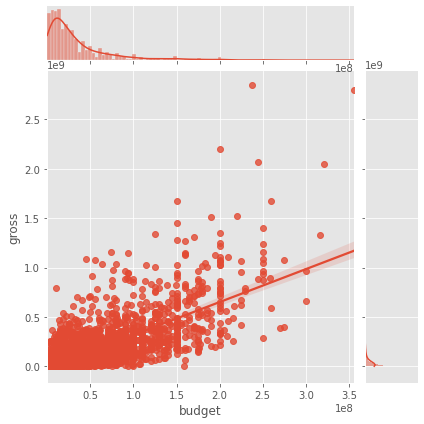

In [8]:
sns.jointplot(x='budget', y='gross', data=df, kind='reg')

<AxesSubplot:xlabel='gross', ylabel='score'>

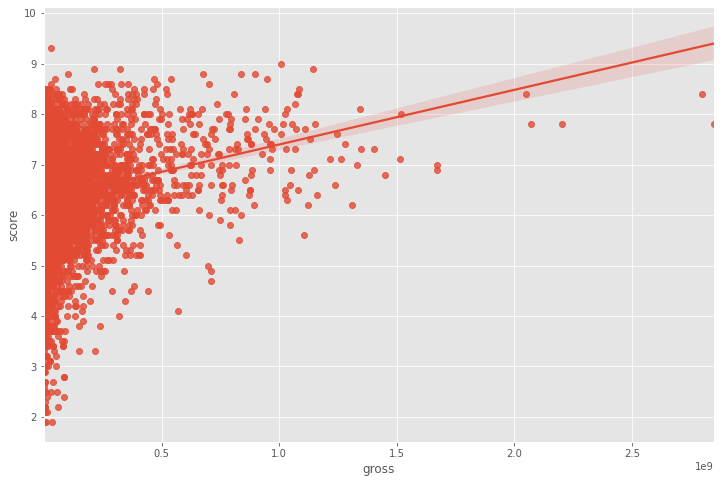

In [9]:
sns.regplot(x='gross', y='score', data=df)

In [10]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Text(87.0, 0.5, 'Movie features')

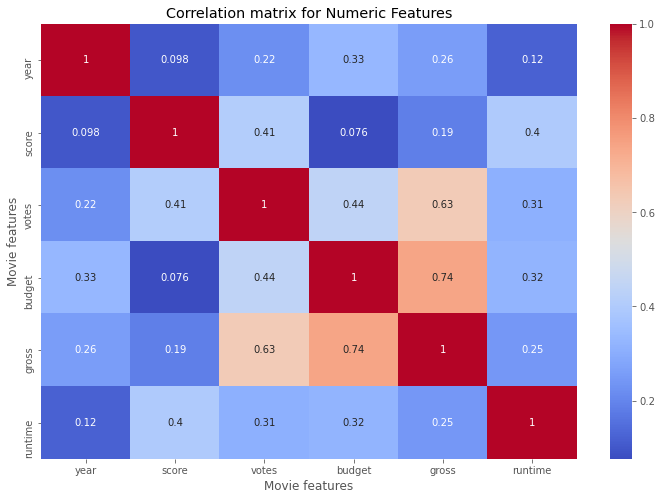

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

In [12]:
# Extracting date and location in a column and assign to corresponding columns

df['date'] = df['released'].str.split('(',expand=True)[0]
df['location'] = df['released'].str.split('(',expand=True)[1]
# Removing the close parethesis in location
df['location'] = df['location'].str.split(')',expand=True)[0]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",United States


In [13]:
# Dropping NA values in the table

df.dropna(inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",United States


In [14]:
# Convert date data type to datetime
df['date'] = pd.to_datetime(df['date'])

# Getting month number of each date in order to sort values in pivot table
df['mm'] = pd.to_datetime(df['date']).dt.month
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,mm
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009-12-18,United States,12
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019-04-26,United States,4
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997-12-19,United States,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015-12-18,United States,12
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018-04-27,United States,4


In [15]:
# Creating pivot tables for heatmap

df1 = df.pivot_table(values='gross', index='mm', columns='year', aggfunc=np.sum, fill_value=0)
df1

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mm,,,,,,,,,,,,,,,,,,,,,
1,0,20633516,199078,93323072,26318771,38672626,107813307,262143177,132741182,371828300,...,1154970473,816556410,1107597986,1783104901,911921433,2412726721,1347157059,932770427,1108095888,671992997
2,64006979,31774816,125334139,39957048,166383622,267186355,258863687,136914249,181737218,142826334,...,1223910515,1360825505,1038876301,1932684083,1506310963,1677177179,1260881571,2397972393,2162336172,775830641
3,3763988,161203524,50148940,85132771,351901193,239123413,168906364,215776156,202563801,169354161,...,1274785211,2240993555,2099741971,1830206479,1642349235,2624468806,3605632394,1707387194,2059391580,0
4,4019339,135122377,24394647,139495773,69089144,114586399,44851642,173074398,120365495,246080777,...,1878391286,858372544,755363654,1884421552,1923964272,1306614956,1716303917,3144277511,3660812937,0
5,80211825,126005028,229783797,559957781,431906302,479384617,517606765,364731377,529485570,570163368,...,3408362592,3073308991,4083820896,3314996295,2927560926,2613504259,2388668896,1456574765,2838802132,0
6,903957516,715370020,1141512820,414051894,793854797,257194971,375362420,453100589,946687616,1162806233,...,3089472850,3135076046,2769432060,2915253326,3166553510,3363696199,3871011029,3257155012,2482879365,0
7,220268056,287902295,164345386,245275813,138513158,551452734,279161397,345105822,605115546,606129500,...,3371506779,3044438339,3687530730,2021290481,3728850237,3491506310,2664051218,3005054542,3349122008,0
8,62781371,49077419,235098219,103248117,138395612,169850887,255099665,299848961,187408557,397267793,...,1346552787,1449981530,1764836626,2414732117,1007197943,1816293719,784384845,1542306957,1749189121,461421559
9,69524583,46650116,46784552,111447682,84033668,49882088,334997381,356461320,54153415,299066884,...,837433240,1203869321,902757241,724444186,1587906189,1334087849,1601134230,1246999622,1278075298,363656624


In [16]:
# Drop year 2020 column to minimize na values in our heatmap

df1.drop(columns=2020, inplace=True)

In [17]:
# Creating new column to set index in order to sort index by month

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df1['Month'] = month_order
df1 = df1.set_index('Month')
df1

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,0,20633516,199078,93323072,26318771,38672626,107813307,262143177,132741182,371828300,...,728219179,1154970473,816556410,1107597986,1783104901,911921433,2412726721,1347157059,932770427,1108095888
Feb,64006979,31774816,125334139,39957048,166383622,267186355,258863687,136914249,181737218,142826334,...,1229657573,1223910515,1360825505,1038876301,1932684083,1506310963,1677177179,1260881571,2397972393,2162336172
Mar,3763988,161203524,50148940,85132771,351901193,239123413,168906364,215776156,202563801,169354161,...,2226060400,1274785211,2240993555,2099741971,1830206479,1642349235,2624468806,3605632394,1707387194,2059391580
Apr,4019339,135122377,24394647,139495773,69089144,114586399,44851642,173074398,120365495,246080777,...,1231979709,1878391286,858372544,755363654,1884421552,1923964272,1306614956,1716303917,3144277511,3660812937
May,80211825,126005028,229783797,559957781,431906302,479384617,517606765,364731377,529485570,570163368,...,2414720103,3408362592,3073308991,4083820896,3314996295,2927560926,2613504259,2388668896,1456574765,2838802132
June,903957516,715370020,1141512820,414051894,793854797,257194971,375362420,453100589,946687616,1162806233,...,3059193322,3089472850,3135076046,2769432060,2915253326,3166553510,3363696199,3871011029,3257155012,2482879365
Jul,220268056,287902295,164345386,245275813,138513158,551452734,279161397,345105822,605115546,606129500,...,2563574401,3371506779,3044438339,3687530730,2021290481,3728850237,3491506310,2664051218,3005054542,3349122008
Aug,62781371,49077419,235098219,103248117,138395612,169850887,255099665,299848961,187408557,397267793,...,1400755279,1346552787,1449981530,1764836626,2414732117,1007197943,1816293719,784384845,1542306957,1749189121
Sep,69524583,46650116,46784552,111447682,84033668,49882088,334997381,356461320,54153415,299066884,...,1077292739,837433240,1203869321,902757241,724444186,1587906189,1334087849,1601134230,1246999622,1278075298


<AxesSubplot:xlabel='year', ylabel='Month'>

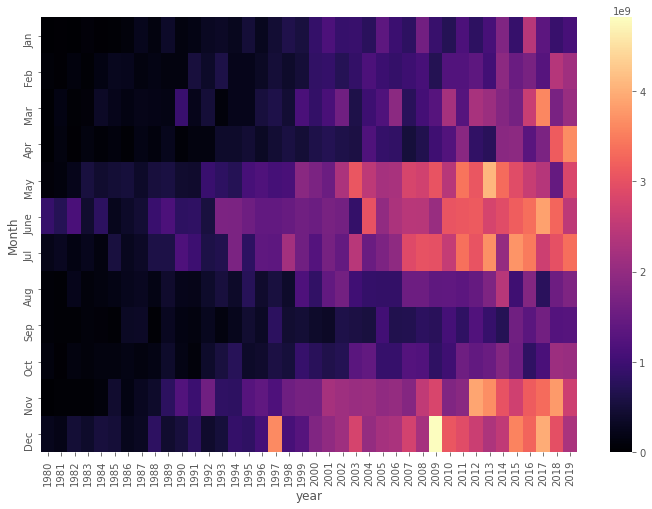

In [18]:
# Creating the heatmap to determine what months or years released have the highest gross

sns.heatmap(df1, cmap='magma')

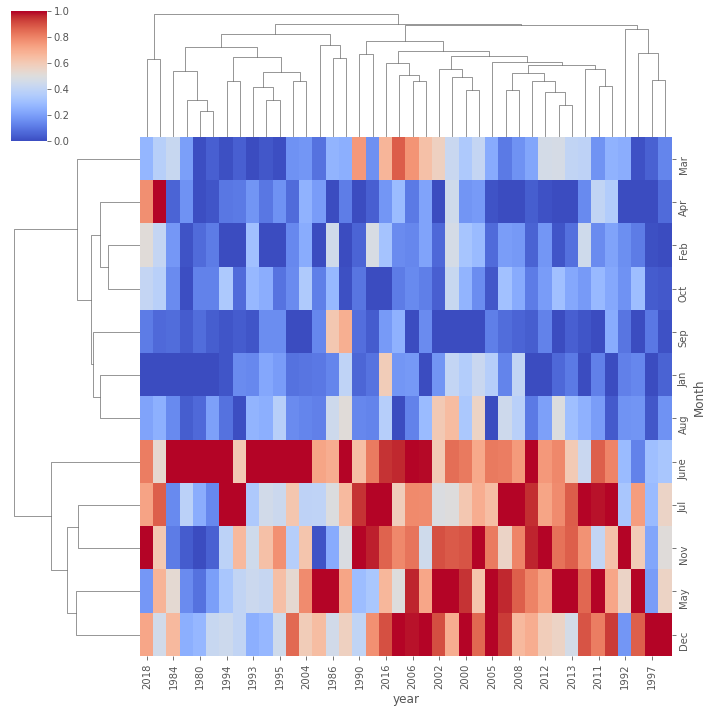

In [19]:
sns.clustermap(df1,cmap='coolwarm',standard_scale=1)

In [20]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name  name        1.000000
      rating      0.314800
      genre       0.186668
      year        0.267282
      released    0.667784
                    ...   
mm    company     0.070485
      runtime    -0.003479
      date        0.166383
      location    0.007915
      mm          1.000000
Length: 324, dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

rating    score      -0.075109
score     rating     -0.075109
year      location   -0.073667
location  year       -0.073667
country   score      -0.057087
                        ...   
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
writer    writer      1.000000
mm        mm          1.000000
Length: 324, dtype: float64

In [22]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,mm
name,1.000000,0.314800,0.186668,0.267282,0.667784,0.136453,0.608411,0.679807,0.764057,0.599409,0.124405,0.526690,0.986431,0.631721,0.089567,0.603458,0.256134,0.145058
rating,0.314800,1.000000,0.031419,0.096638,0.241252,-0.075109,0.121122,0.230190,0.251470,0.226006,0.111309,0.283770,0.319778,0.269792,0.029208,0.200620,0.150571,0.086295
genre,0.186668,0.031419,1.000000,0.075279,0.115080,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.117926,0.019848,-0.007248
year,0.267282,0.096638,0.075279,1.000000,0.359790,0.045163,0.286895,0.186505,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.408948,-0.073667,-0.027945
released,0.667784,0.241252,0.115080,0.359790,1.000000,0.099607,0.481682,0.478949,0.541156,0.439566,0.095519,0.396935,0.677897,0.410408,0.058182,0.921766,0.338738,0.156073
score,0.136453,-0.075109,0.047421,0.045163,0.099607,1.000000,0.247863,0.176117,0.122357,0.139127,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.120519,-0.039419,0.016900
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.478817,0.068632,0.085142
director,0.679807,0.230190,0.131437,0.186505,0.478949,0.176117,0.472671,1.000000,0.642875,0.504992,0.123672,0.443151,0.692902,0.528071,0.084943,0.428919,0.202348,0.107333
writer,0.764057,0.251470,0.129595,0.231664,0.541156,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.489337,0.214845,0.109628
star,0.599409,0.226006,0.143735,0.240670,0.439566,0.139127,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455444,0.096652,0.406911,0.135700,0.098740


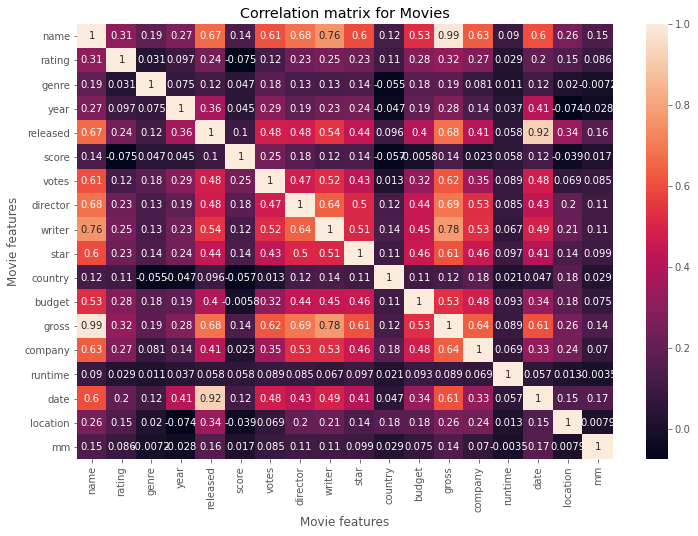

In [23]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [24]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name  name        1.000000
      rating      0.314800
      genre       0.186668
      year        0.267282
      released    0.667784
                    ...   
mm    company     0.070485
      runtime    -0.003479
      date        0.166383
      location    0.007915
      mm          1.000000
Length: 324, dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

rating    score      -0.075109
score     rating     -0.075109
year      location   -0.073667
location  year       -0.073667
country   score      -0.057087
                        ...   
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
writer    writer      1.000000
mm        mm          1.000000
Length: 324, dtype: float64

In [26]:
# Looking at pairs with higher than 0.5 correlations

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
writer    votes       0.522918
                        ...   
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
writer    writer      1.000000
mm        mm          1.000000
Length: 68, dtype: float64

In [27]:
# Looking at top 10 highest gross per country

country_gross = df.groupby('location')[['gross']].sum()

country_gross_sort = country_gross.sort_values(['gross', 'location'], ascending=False)[:10]

country_gross_sort = country_gross_sort['gross'].astype('int64')

country_gross_sort

location
United States     556091509414
China                927781667
United Kingdom       634213919
France               290482490
Italy                272135826
Hong Kong            202342933
Germany              140411489
Spain                116593159
Japan                112448423
South Korea          106985203
Name: gross, dtype: int64

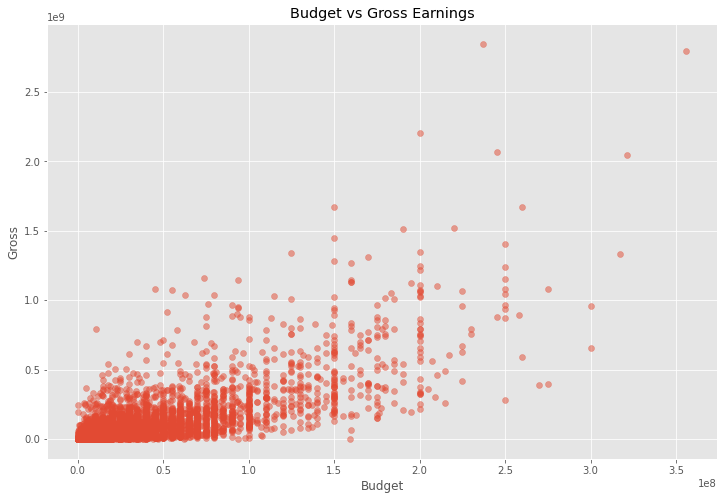

In [28]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [29]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,location,mm
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009-12-18,47,12
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019-04-26,47,4
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997-12-19,47,12
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015-12-18,47,12
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018-04-27,47,4


In [30]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,location,mm
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.002908,0.023062
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.063883,-0.042176
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.075552,0.009486
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.062768,-0.024778
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.027578,0.316130
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,-0.043528,0.050600
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.066105,0.058735
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.005705,-0.009622
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.001983,-0.007123
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.023346,0.015260


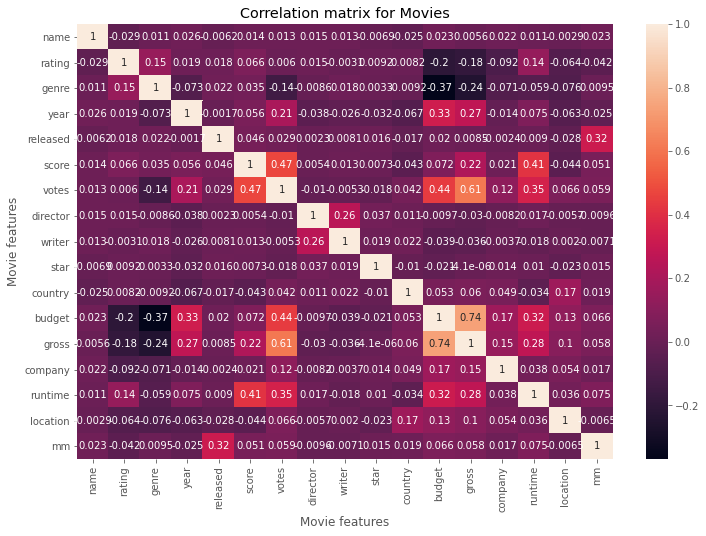

In [31]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

<AxesSubplot:xlabel='rating', ylabel='score'>

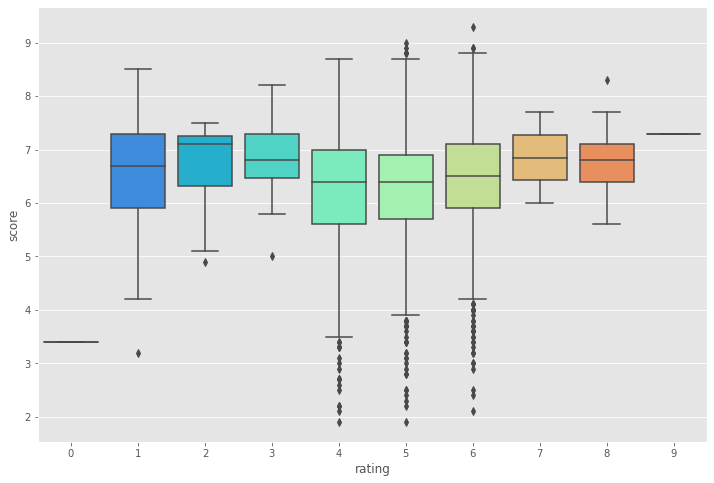

In [32]:
sns.boxplot(x='rating', y='score', data=df,palette='rainbow')

<AxesSubplot:xlabel='rating', ylabel='gross'>

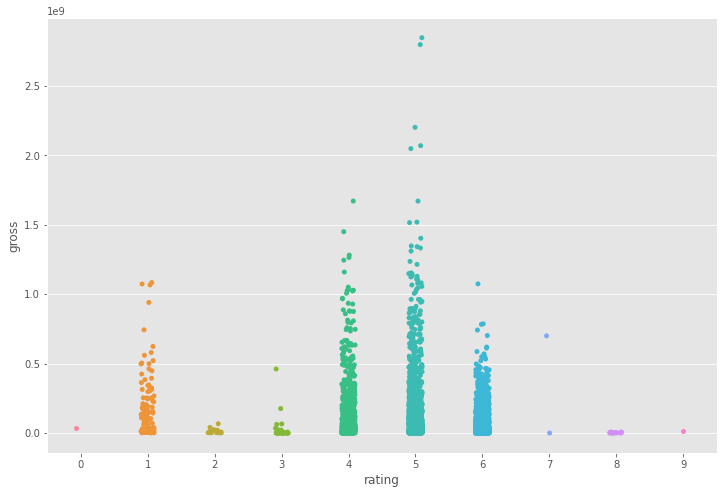

In [33]:
sns.stripplot(x="rating", y="gross", data=df)